<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_5_MNIST_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Βιβλιοθήκες


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from PIL import Image

# Ερώτημα 1

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Ερώτημα 2

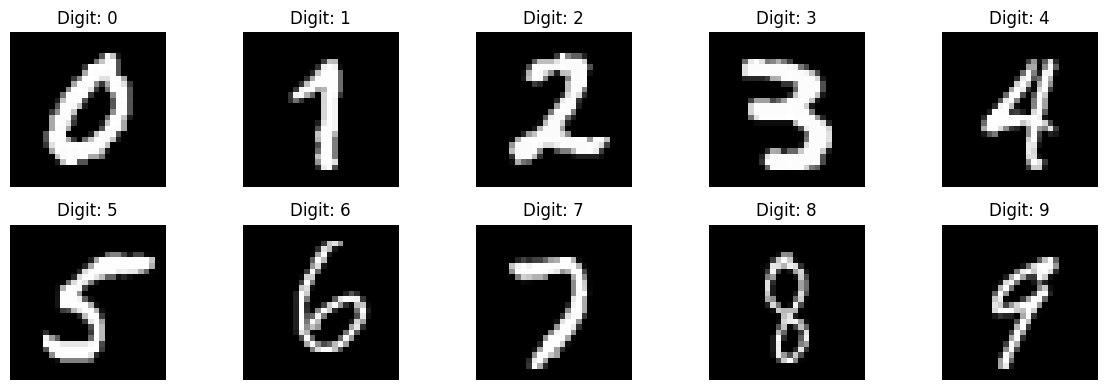

In [17]:
plt.figure(figsize=(12, 4))

for digit in range(10):
  indices = np.where(y_train == digit)[0]
  random_idx = np.random.choice(indices)
  image = x_train[random_idx]
  plt.subplot(2, 5, digit + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f"Digit: {digit}")
  plt.axis('off')

plt.tight_layout()
plt.show()

# Ερώτημα 3


*   Από το ".shape" του ερωτηματος (1), βλεπουμε οτι η εικονα ειναι 28x28, αρα 784 pixels.
*   Προφανως δεν ειναι ολα τα pixels χρησιμα. Μας ενδιαφερουν τα pixels που ειναι πανω στο ψηφιο (λευκα) το ιδιο (στις γραμμες και καμπυλες του) και οχι αυτα που δημιουργουν το μαυρο περιβαλλον (μαυρα).

# Ερώτημα 4

In [18]:
x_train_vector = x_train.reshape(x_train.shape[0], -1)
x_test_vector = x_test.reshape(x_test.shape[0], -1)

print(x_train_vector.shape)
print(x_test_vector.shape)

(60000, 784)
(10000, 784)


# Ερώτημα 5

best k value before normalization is: 1
best test accuracy before normalization is: 0.9691


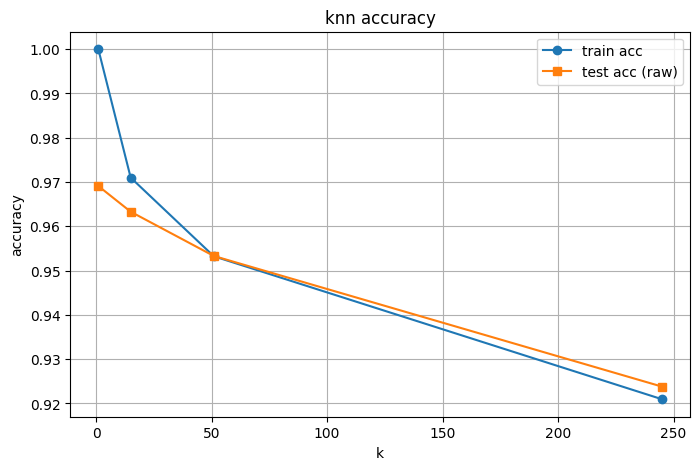

In [19]:
k_values = [1, 15, 51, 245]

train_accuracies = []
test_accuracies = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_vector, y_train)

  y_train_prediction = knn.predict(x_train_vector)
  y_test_prediction = knn.predict(x_test_vector)

  accuracy_train = accuracy_score(y_train, y_train_prediction)
  accuracy_test = accuracy_score(y_test, y_test_prediction)

  train_accuracies.append(accuracy_train)
  test_accuracies.append(accuracy_test)

best_k_index_before_normalization = np.argmax(test_accuracies)
best_k_value_before_normalization = k_values[best_k_index_before_normalization]
best_test_accuracy_before_normalization = test_accuracies[best_k_index_before_normalization]
print(f"best k value before normalization is: {best_k_value_before_normalization}")
print(f"best test accuracy before normalization is: {best_test_accuracy_before_normalization}")

plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', label='train acc')
plt.plot(k_values, test_accuracies, marker='s', label='test acc (raw)')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('knn accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Ερώτημα 6

best k value is: 1
best test accuracy is: 0.9691


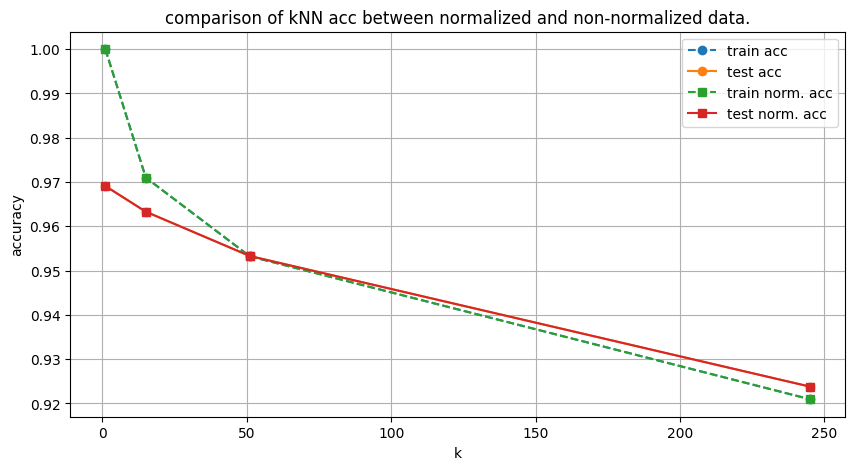

In [20]:
x_train_normalized = x_train_vector.astype('float32') / 255.0
x_test_normalized = x_test_vector.astype('float32') / 255.0

train_accuracies_of_normalized_data = []
test_accuracies_of_normalized_data = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_normalized, y_train)

  y_train_prediction = knn.predict(x_train_normalized)
  y_test_prediction = knn.predict(x_test_normalized)

  accuracy_train = accuracy_score(y_train, y_train_prediction)
  accuracy_test = accuracy_score(y_test, y_test_prediction)

  train_accuracies_of_normalized_data.append(accuracy_train)
  test_accuracies_of_normalized_data.append(accuracy_test)

# best k procedure

best_k_index = np.argmax(test_accuracies_of_normalized_data)
best_k_value = k_values[best_k_index]
best_test_accuracy = test_accuracies_of_normalized_data[best_k_index]
print(f"best k value is: {best_k_value}")
print(f"best test accuracy is: {best_test_accuracy}")

plt.figure(figsize=(10, 5))

plt.plot(k_values, train_accuracies, marker='o', linestyle='--', label='train acc')
plt.plot(k_values, test_accuracies, marker='o', label='test acc')

plt.plot(k_values, train_accuracies_of_normalized_data, marker='s', linestyle='--', label='train norm. acc')
plt.plot(k_values, test_accuracies_of_normalized_data, marker='s', label='test norm. acc')

plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('comparison of kNN acc between normalized and non-normalized data.')
plt.legend()
plt.grid(True)
plt.show()


Στο συγκεκριμενο παραδειγμα δεν εχει καμια απολυτως διαφορα - παραμενουν ιδιες οι τιμες μετα την κανονικοποιηση. Ειναι λογικο να γινεται, γιατι η κανονικοποιηση γινεται ομοιομορφα για ολες τις τιμες (χωρις καποιο βαρος για συγκεκριμενες τιμες πχ). Εφοσον ολα τα διανυσματα πολλαπλασιαζονται με την ιδια τιμη, θα αλλαξουν αριθμητικα, αλλα ποσοστιαια θα μεινουν ιδια. Εφοσον ποσοστιαια θα μεινουν ιδια, ιδιες θα μεινουν και οι προβλεψεις τους. Για αυτο και τα 2 γραφηματα ειναι ιδια (εφαπτοντε).

# Ερώτημα 7

In [21]:
my_image = Image.open('/content/fat123.png')
img_gray = my_image.convert('L')
img_gray = img_gray.resize((28, 28))
img_array = np.array(img_gray)
img_array = img_array.astype('float32') / 255.0

#  vector transformation
img_flat = img_array.reshape(1, -1)

print("vector of image: ", img_flat.shape)
best_knn = KNeighborsClassifier(n_neighbors=best_k_value)
best_knn.fit(x_train_normalized, y_train)

prediction_of_my_digit = best_knn.predict(img_flat)[0]
print(f"the prediction is: {prediction_of_my_digit}")

vector of image:  (1, 784)
the prediction is: 3


παρατηρησα πως οταν βαζω εικονα με παχυ χρωμα και διαγραμμηση τοτε το βγαζει σωστο - οταν η γραμμη ειναι λεπτη τοτε το βγαζει λαθος

το βρισκω μεχρι ενα βαθμο λογικο, γιατι στην παχια διαγραμμηση εχει παρπαανω τελειες κοντα στην τελεια στοχο, επομενως μπορει να εχει μεγαλυτερη σιγουρια για το τι αριθμος ειναι (ανεβασα την φωτο που διαβαζει σωστα, και απο κατω αυτη που διαβαζει λαθος).

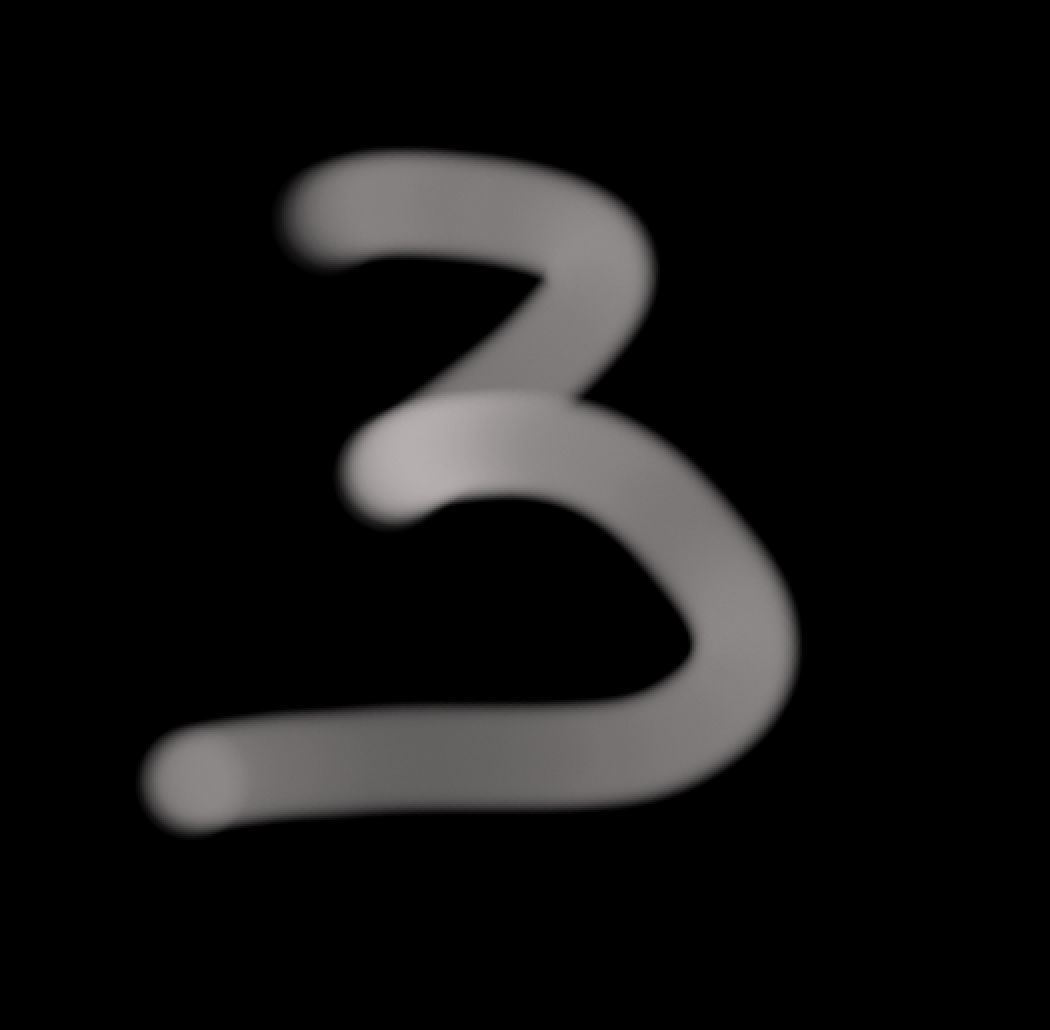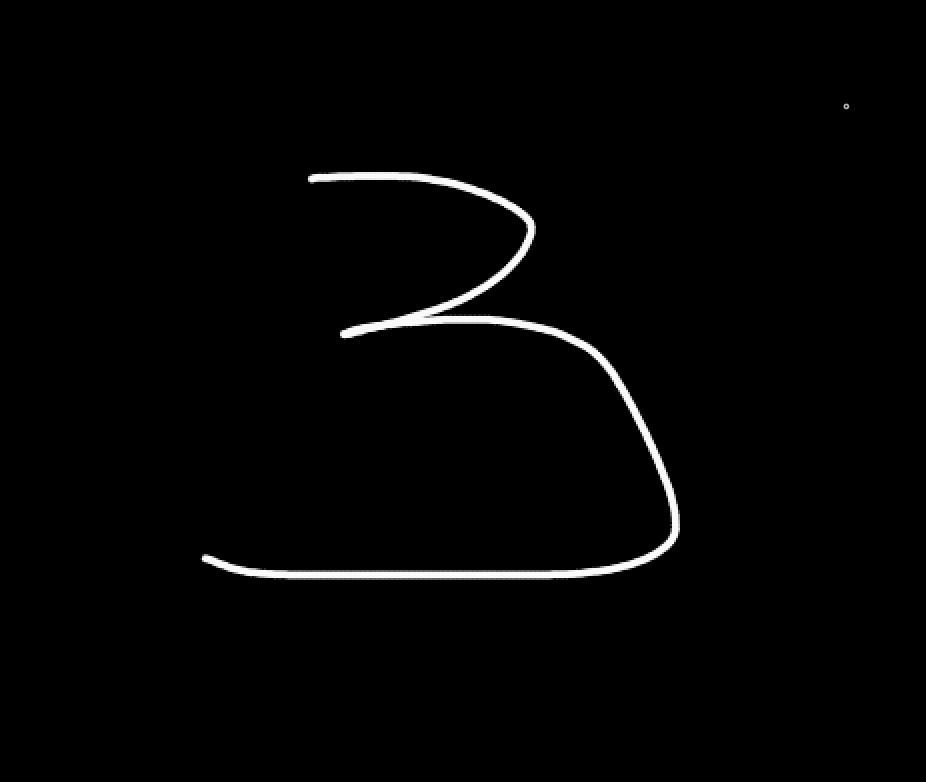